# Problem Set 2: Intro to Pandas

## Part 1

In this problem set, we want to determine if we can use voter registrations as a proxy for votes cast. Because who you vote for on an individual basis is not recorded, we would like to see if the numbers for those registered in a precinct as Republican or Democrate actually reflect the results of the election based on the outcome. We'll continue our analysis of Centre County, Pennsylvania, and we are going to use Pandas, Numpy, and Matplotlib as our tools to explore the data.


Building off the in class example, first a short example will introduce us to the dataset, some data wrangling functions of Pandas, and a few plots with Matplotlib.



Throughout the exercises we will be continuously using Pandas and some of its merging functionality to join the numerous OD files available. We will be building exploratory data visualizations, finding urban patterns and locating divergent areas within the dataset. Some useful documentation for merging data with Pandas can be found at:


http://pandas.pydata.org/pandas-docs/stable/merging.html

First, lets install our libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from itertools import cycle, islice

# This line lets us plot on our ipython notebook
%matplotlib inline

Next, let's open up one of the files. Let's look at the voter registrations, this is the same as we did in the inclass.

**Problem 1: Load CENTER_FVE_20170123.csv into Pandas as a data frame called 'df_voters'.**

In [2]:
# We are reading a CSV with election data
df_voters = pd.read_table('data/CENTRE_FVE_20170123.csv', sep=',', low_memory=False)
df_voters

,1,2,3,4,5,6,7,8,9,10,...,144,145,146,147,148,149,150,151,152,153
0,002013865-14,NaN,MILLS,JAMES,ARTHUR,NaN,M,2/7/65,10/1/00,A,...,NaN,AB,R,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN
1,002020582-14,NaN,TERRY,CHARLES,D,NaN,U,9/16/76,9/1/02,I,...,NaN,NaN,NaN,NaN,NaN,AP,D,NaN,CENTRE,NaN
2,002287451-14,NaN,MURRELL,RICHARD,L,NaN,M,8/11/50,10/1/72,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN
3,002365541-14,NaN,MILLS,JOYCE,ELLEN,NaN,F,5/6/69,10/1/00,A,...,NaN,AP,R,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN
4,002370224-14,NaN,FENTON,CASEY,JAMES,NaN,M,11/22/83,3/1/02,A,...,NaN,AP,D,NaN,NaN,NaN,NaN,5707687675,CENTRE,NaN
5,002572852-14,NaN,MURRELL,SUSAN,L,NaN,F,12/16/49,10/1/94,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN
6,004529096-14,NaN,HAIR,STEVEN,M,NaN,M,12/11/79,12/21/99,A,...,NaN,AP,R,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN
7,005138406-14,NaN,BROOKS,HARRY,C,NaN,M,3/19/50,1/1/01,A,...,R,AP,R,NaN,NaN,AP,R,NaN,CENTRE,NaN
8,005163451-14,NaN,BROOKS,DEBRA,LOUISE,NaN,F,5/22/51,3/15/91,A,...,R,AP,R,NaN,NaN,AP,R,NaN,CENTRE,NaN
9,005194526-14,NaN,GENSIMORE,GARY,DAVID,NaN,M,3/6/68,5/22/96,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN


To start us off, we need to determine party affiliations for each of those registered. Reading in the metadata, this is held in column 12. Let's take a look at unique party registrations in column 12.

**The data documentation file is located in your data folder. It will describe the fields.**

In [3]:
# View the unique values in column 12
df_voters['12'].unique()

array(['R', 'D', 'NF', 'LN', 'I', 'NON', 'AT', 'GR', 'NO', 'OTH', 'S',
       'TP', 'AE', 'NOP', 'NST', 'SEC', 'UPP', 'GW', 'INDE', 'C', 'CT',
       'DNV', 'AI', 'PR', 'INDd', 'IND', 'ID', 'WH', 'GP', 'PL', 'MW',
       'AM', 'UNA', nan, 'LI', 'IAPP', 'THPY', 'IR', 'UNK', 'NTS', 'DS',
       'SAME', 'IT', 'ICO', 'BM', 'M', 'NS', 'JD', 'LT', 'BH', 'AH', 'MZ',
       'PG', 'PP', 'NL', 'UND', 'N', 'FD', 'IDK', 'RF', 'AYE', 'AD',
       'PPOA', 'MA', 'MM', 'OLAP', 'CNT', 'AF', 'CON', 'GT', 'FR', 'AC',
       'DTP', 'CH', 'SOD', 'IK', 'PZ', 'PIR', 'H', 'FE', 'COL', 'BP', 'CB',
       'AL', 'CM', 'OP', 'IA', 'L', 'TPP', 'ACO', 'COI', 'MAJA', 'KEG'], dtype=object)

There are quite a few, and its pretty messy. Let's to explore MatPlotLib, let's make some charts to see which parties have the highest subscriptions and graph it in a bar chart.

**Group our data so we can plot. Find the number of subscribers to each party and sum them in a table. Call your new data frame 'df_summed', name the columns 'PARTY' and 'NUMBER'**

In [4]:
# group data by party subscriber and sum in a table
grouped = df_voters.groupby('12') # Group by party registrations
summed = grouped['12'].count() # Get counts of each group
summed.sort_values(inplace=True, ascending=False)
df_summed = summed.to_frame()
df_summed.columns = ['NUMBER']
df_summed.index.names = ['PARTY']
df_summed

,NUMBER
PARTY,
D,51162
R,47668
NF,17608
NON,2814
I,2006
LN,805
OTH,368
GR,264
INDE,183


Now, let's make a bar chart to do some initial exploration of the data. To get a simple exploratory plot, we use Matplotlib. Matplotlib is integrated into Pandas, and you can create plots from data frames. For more reading, check out the Matplotlib documentation at [Pandas Plotting Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) and the [Matplotlib Documentation](http://matplotlib.org/2.0.0/contents.html).

Using **df_summed** that you just created, the following will give you a basic bar chart of your dataset.

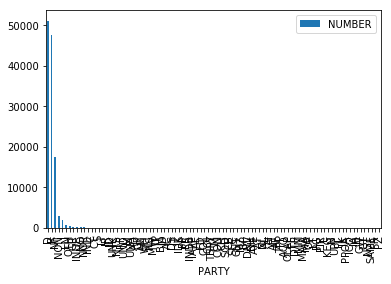

In [5]:
df_summed.plot.bar(legend=True)

This is alot of values! It doesn't make much sense to show them all, let's group categories into three, Republican, Democrat, or Other. We can do this doing some grouping and by implementing what we've learned so far. The following shows you how to find all of the party affiliations that are not 'Democrat' or 'Republican'.

In [6]:
# group into three categories: republican, democrat and other
df_summed[(df_summed.index != 'D') & (df_summed.index != 'R')]

,NUMBER
PARTY,
NF,17608
NON,2814
I,2006
LN,805
OTH,368
GR,264
INDE,183
NO,175
NOP,137


Group the parties into Democrat, Republican, and Other. Create a single row table with parties as the rows, and the number of voter registrations as columns. The rows should be Democrat, Republican, and Other. Call the table 'df_parties'

Hint, sum the values you want from **df_summed** for each group and save them as variables. You will then need to create a new numpy array that contains the summed valued for each group and create the new data frame with your answer. This [Stack Exchange Question](http://stackoverflow.com/questions/17839973/construct-pandas-dataframe-from-values-in-variables) will help you, along with the [Pandas documentation on DataFrames](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe).

In [7]:
parties = ['Democrat', 'Republican', 'Other']
values = np.array([df_summed[(df_summed.index == 'D')].NUMBER.item(),df_summed[(df_summed.index == 'R')].NUMBER.item(),df_summed[(df_summed.index != 'D') & (df_summed.index != 'R')].NUMBER.sum()])
df_parties = pd.DataFrame(values,index=parties,columns=list('N'))
df_parties               

,N
Democrat,51162
Republican,47668
Other,24609


**Problem 2: Plot this as a bar chart, using red for Republican, blue for Democrat, and yellow for other.**

You can learn more about bar plots in in the [Bar Plot Documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-barplot). This will also give you hints as to how you can assign colors, along with the other properties affiated with bar charts, such as legends and axes.

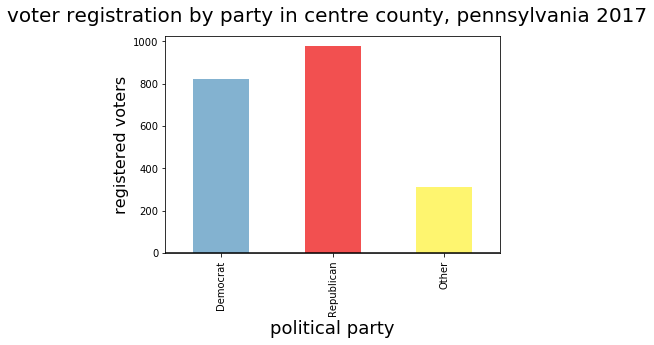

In [44]:
# plot the bar chart by party with a specific color for each party
df_parties.plot.bar(color=['#83b2d0', '#f25050', '#fef56f'], legend=None);
plt.axhline(0, color='k')
plt.suptitle('voter registration by party in centre county, pennsylvania 2017', fontsize=20)
plt.xlabel('political party', fontsize=18)
plt.ylabel('registered voters', fontsize=16)

**Problem 3: For this next question, implement the above. We want to compare how the number of voter registrations to election results for one precinct (PRECINCT 42). Create a bar chart that has two bars each for category (Democrat, Republican, and Other). One of the bars will represent the number of registered voters to that party, and the second bar representing the count of results (ie how many people actually voted for that parties candidate) for each group**

Hint, you will have to load the precinct level result data into Pandas, then perform the correct grouping and summing to get the numbers you need from both the voter registration data and the precinct level results, then join the two into single dataframe to make your chart. You can base your answers on the following help page: http://chrisalbon.com/python/matplotlib_grouped_bar_plot.html

In [9]:
# read in a CSV with election data
df_voters = pd.read_table('data/CENTRE_FVE_20170123.csv', sep=',', low_memory=False)
df_voters

,1,2,3,4,5,6,7,8,9,10,...,144,145,146,147,148,149,150,151,152,153
0,002013865-14,NaN,MILLS,JAMES,ARTHUR,NaN,M,2/7/65,10/1/00,A,...,NaN,AB,R,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN
1,002020582-14,NaN,TERRY,CHARLES,D,NaN,U,9/16/76,9/1/02,I,...,NaN,NaN,NaN,NaN,NaN,AP,D,NaN,CENTRE,NaN
2,002287451-14,NaN,MURRELL,RICHARD,L,NaN,M,8/11/50,10/1/72,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN
3,002365541-14,NaN,MILLS,JOYCE,ELLEN,NaN,F,5/6/69,10/1/00,A,...,NaN,AP,R,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN
4,002370224-14,NaN,FENTON,CASEY,JAMES,NaN,M,11/22/83,3/1/02,A,...,NaN,AP,D,NaN,NaN,NaN,NaN,5707687675,CENTRE,NaN
5,002572852-14,NaN,MURRELL,SUSAN,L,NaN,F,12/16/49,10/1/94,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN
6,004529096-14,NaN,HAIR,STEVEN,M,NaN,M,12/11/79,12/21/99,A,...,NaN,AP,R,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN
7,005138406-14,NaN,BROOKS,HARRY,C,NaN,M,3/19/50,1/1/01,A,...,R,AP,R,NaN,NaN,AP,R,NaN,CENTRE,NaN
8,005163451-14,NaN,BROOKS,DEBRA,LOUISE,NaN,F,5/22/51,3/15/91,A,...,R,AP,R,NaN,NaN,AP,R,NaN,CENTRE,NaN
9,005194526-14,NaN,GENSIMORE,GARY,DAVID,NaN,M,3/6/68,5/22/96,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN


In [10]:
# pull out data for precinct 42
df_voters42 = df_voters.loc[df_voters['27'] == 42]
df_voters42

,1,2,3,4,5,6,7,8,9,10,...,144,145,146,147,148,149,150,151,152,153
60899,001060962-14,NaN,MISKA,JENNIFER,SELLER,NaN,F,8/5/61,1/4/02,A,...,D,AP,D,AP,D,NaN,NaN,NaN,CENTRE,NaN
60900,001076841-14,NaN,DUNN,LORETTA,M,NaN,U,11/4/17,1/1/82,I,...,NaN,NaN,NaN,NaN,NaN,AB,D,NaN,CENTRE,NaN
60901,001109561-14,NaN,BEECHAM,JANA,MICHELLE,NaN,F,4/14/72,1/1/92,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8142312689,CENTRE,NaN
60902,001304938-14,NaN,WELESKO,JOHN,P,NaN,M,9/11/42,12/18/63,A,...,R,AP,R,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN
60903,001350294-14,NaN,WELESKO,MAUREEN,A,NaN,F,10/16/49,9/7/76,A,...,R,AP,R,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN
60904,001352001-14,NaN,FREY,BARBARA,J,NaN,F,1/29/48,10/5/77,A,...,D,AP,D,NaN,NaN,NaN,NaN,8142383595,CENTRE,NaN
60905,001403271-14,NaN,ZARITSKI,THOMAS,M,NaN,M,10/5/77,10/5/95,A,...,NaN,AP,R,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN
60906,001516546-14,NaN,STONER,DIANE,M,NaN,F,11/16/68,10/1/92,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN
60907,001554049-14,NaN,STONER,GREGORY,DEAN,NaN,M,12/26/65,6/22/92,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN
60908,001594460-14,NaN,REICHART,KATHRYN,D,NaN,F,7/27/62,7/3/96,A,...,NaN,AP,R,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN


In [11]:
# group data by party subscriber and sum in a table
grouped = df_voters42.groupby('12') # Group by party registrations
summed = grouped['12'].count() # Get counts of each group
summed.sort_values(inplace=True, ascending=False)
df_summed = summed.to_frame()
df_summed.columns = ['NUMBER']
df_summed.index.names = ['PARTY']
df_summed

# group into three categories: republican, democrat and other
df_summed[(df_summed.index != 'D') & (df_summed.index != 'R')]
parties = ['Democrat', 'Republican', 'Other']
values = np.array([df_summed[(df_summed.index == 'D')].NUMBER.item(),df_summed[(df_summed.index == 'R')].NUMBER.item(),df_summed[(df_summed.index != 'D') & (df_summed.index != 'R')].NUMBER.sum()])
df_parties = pd.DataFrame(values,index=parties,columns=list('N'))
df_parties  

,N
Democrat,824
Republican,978
Other,314


In [12]:
# Read Election Results data and create a table for Precinct 42
df_results = pd.read_table('data/centrecounty_precinct_results_nov2016.txt', sep=',')
# Look at the data for precinct 42
df_results[df_results['PrecNo'] == 42]

,County,ElecYear,Election,ElecDate,PrecNo,PrecName,Party,Contest,Descr,VoteFor,Candidate,Posn,Count,PctCnt,Total,PctTot
1576,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,NaN,REGISTERED VOTERS - TOTAL,NaN,NaN,NaN,3472.0,2097.0,NaN,NaN,NaN
1577,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,NaN,BALLOTS CAST - TOTAL,NaN,NaN,NaN,3473.0,1626.0,NaN,NaN,NaN
1578,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,NaN,VOTER TURNOUT - TOTAL,NaN,NaN,NaN,3474.0,NaN,77.54,NaN,NaN
1579,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,DEMOCRATIC,STRAIGHT PARTY,NaN,VOTE FOR NOT MORE THAN 1,DEMOCRATIC,3479.0,303.0,45.63,NaN,NaN
1580,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,REPUBLICAN,STRAIGHT PARTY,NaN,VOTE FOR NOT MORE THAN 1,REPUBLICAN,3480.0,358.0,53.92,NaN,NaN
1581,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,CONSTITUTION PARTY,STRAIGHT PARTY,NaN,VOTE FOR NOT MORE THAN 1,CONSTITUTION PARTY,3481.0,0.0,NaN,NaN,NaN
1582,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,GREEN,STRAIGHT PARTY,NaN,VOTE FOR NOT MORE THAN 1,GREEN,3482.0,1.0,0.15,NaN,NaN
1583,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,LIBERTARIAN,STRAIGHT PARTY,NaN,VOTE FOR NOT MORE THAN 1,LIBERTARIAN,3483.0,2.0,0.30,NaN,NaN
1584,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,DEMOCRATIC,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"HILLARY CLINTON, PRESIDENT",3488.0,802.0,49.54,NaN,NaN
1585,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,REPUBLICAN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"DONALD J TRUMP, PRESIDENT",3489.0,736.0,45.46,NaN,NaN


In [14]:
# pull out data for precinct 42
df_results42 = df_results.loc[df_results['PrecNo'] == 42]
df_results42

,County,ElecYear,Election,ElecDate,PrecNo,PrecName,Party,Contest,Descr,VoteFor,Candidate,Posn,Count,PctCnt,Total,PctTot
1576,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,NaN,REGISTERED VOTERS - TOTAL,NaN,NaN,NaN,3472.0,2097.0,NaN,NaN,NaN
1577,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,NaN,BALLOTS CAST - TOTAL,NaN,NaN,NaN,3473.0,1626.0,NaN,NaN,NaN
1578,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,NaN,VOTER TURNOUT - TOTAL,NaN,NaN,NaN,3474.0,NaN,77.54,NaN,NaN
1579,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,DEMOCRATIC,STRAIGHT PARTY,NaN,VOTE FOR NOT MORE THAN 1,DEMOCRATIC,3479.0,303.0,45.63,NaN,NaN
1580,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,REPUBLICAN,STRAIGHT PARTY,NaN,VOTE FOR NOT MORE THAN 1,REPUBLICAN,3480.0,358.0,53.92,NaN,NaN
1581,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,CONSTITUTION PARTY,STRAIGHT PARTY,NaN,VOTE FOR NOT MORE THAN 1,CONSTITUTION PARTY,3481.0,0.0,NaN,NaN,NaN
1582,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,GREEN,STRAIGHT PARTY,NaN,VOTE FOR NOT MORE THAN 1,GREEN,3482.0,1.0,0.15,NaN,NaN
1583,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,LIBERTARIAN,STRAIGHT PARTY,NaN,VOTE FOR NOT MORE THAN 1,LIBERTARIAN,3483.0,2.0,0.30,NaN,NaN
1584,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,DEMOCRATIC,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"HILLARY CLINTON, PRESIDENT",3488.0,802.0,49.54,NaN,NaN
1585,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,REPUBLICAN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"DONALD J TRUMP, PRESIDENT",3489.0,736.0,45.46,NaN,NaN


In [15]:
df_pres42 = df_results42.loc[df_results42['Contest'] == 'PRESIDENTIAL ELECTORS']
df_pres42.head()

,County,ElecYear,Election,ElecDate,PrecNo,PrecName,Party,Contest,Descr,VoteFor,Candidate,Posn,Count,PctCnt,Total,PctTot
1584,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,DEMOCRATIC,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"HILLARY CLINTON, PRESIDENT",3488.0,802.0,49.54,NaN,NaN
1585,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,REPUBLICAN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"DONALD J TRUMP, PRESIDENT",3489.0,736.0,45.46,NaN,NaN
1586,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,CONSTITUTION PARTY,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"DARRELL L CASTLE, PRESIDENT",3490.0,6.0,0.37,NaN,NaN
1587,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,GREEN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"JILL STEIN, PRESIDENT",3491.0,16.0,0.99,NaN,NaN
1588,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,42.0,42 COLLEGE SOUTH,LIBERTARIAN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"GARY JOHNSON, PRESIDENT",3492.0,34.0,2.10,NaN,NaN


In [16]:
# sum by candidate and convert to integer
summed_pres = df_pres42.groupby('Candidate').Count.sum().astype(int)
summed_pres

Candidate
DARRELL L CASTLE,  PRESIDENT      6
DONALD J TRUMP,  PRESIDENT      736
GARY JOHNSON, PRESIDENT          34
HILLARY CLINTON,  PRESIDENT     802
JILL STEIN,  PRESIDENT           16
WRITE-IN                         25
Name: Count, dtype: int64

In [39]:
# convert to dataframe
df_summed_pres = summed_pres.to_frame().astype(int)
df_summed_pres.columns = ['VOTES']
df_summed_pres.index.names = ['CANDIDATE']
print(df_summed_pres.values)
df_summed_pres

[[  6]
 [736]
 [ 34]
 [802]
 [ 16]
 [ 25]]


,VOTES
CANDIDATE,
"DARRELL L CASTLE, PRESIDENT",6
"DONALD J TRUMP, PRESIDENT",736
"GARY JOHNSON, PRESIDENT",34
"HILLARY CLINTON, PRESIDENT",802
"JILL STEIN, PRESIDENT",16
WRITE-IN,25


In [40]:
# group into three categories: republican, democrat and other
df_summed_pres[(df_summed_pres.index != 'HILLARY CLINTON, PRESIDENT') & (df_summed_pres.index != 'DONALD J TRUMP, PRESIDENT')]
presparty = ['Democrat', 'Republican', 'Other']
presvalues = np.array([df_summed_pres[(df_summed_pres.index == 'HILLARY CLINTON,  PRESIDENT')].VOTES.item(),df_summed_pres[(df_summed_pres.index == 'DONALD J TRUMP,  PRESIDENT')].VOTES.item(),df_summed_pres[(df_summed_pres.index != 'HILLARY CLINTON,  PRESIDENT') & (df_summed_pres.index != 'DONALD J TRUMP,  PRESIDENT')].VOTES.sum()])
print(presvalues)
df_presparty = pd.DataFrame(presvalues,index=presparty,columns=list('V'))
df_presparty 

[802 736  81]


,V
Democrat,802
Republican,736
Other,81


In [23]:
# run a join!
df_compare = df_parties.join(df_presparty, lsuffix='N', rsuffix='V')
df_compare.index.names = ['Party']
df_compare

,N,V
Party,,
Democrat,824,802
Republican,978,736
Other,314,81


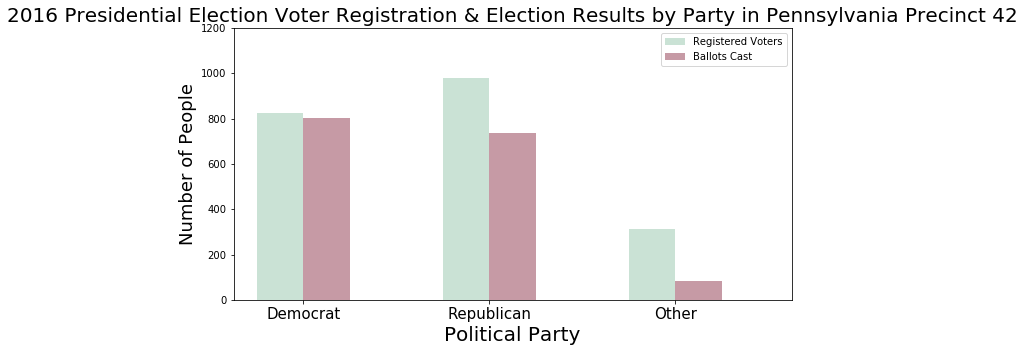

In [68]:
# Chart the dataset

# Set the positions and width of the bars, and plot them
pos = list(range(len(df_compare['N'])))
width = 0.25
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with registration ('N') data, in position pos,
plt.bar(pos,df_compare['N'], width, alpha=0.5, color='#96c7ac')

# Create a bar with voting ('V') data, in position pos + some width buffer,
plt.bar([p + width for p in pos], df_compare['V'], width, alpha=0.5, color='#8e374d')

# Label the chart & axes, and add a legend
ax.set_ylabel('Number of People', fontsize=18)
ax.set_xlabel('Political Party', fontsize=20)
ax.set_title('2016 Presidential Election Voter Registration & Election Results by Party in Pennsylvania Precinct 42', fontsize=20)
plt.legend(['Registered Voters', 'Ballots Cast'], loc='upper right')

# Position & label the x ticks
ax.set_xticks([p + .5 * width for p in pos])
ax.set_xticklabels(df_compare.index, fontsize=15)

# Set x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*3)
plt.ylim([0, 1200])

plt.show()

## Part 2 - Scatterplotting

Now we will use the **precinct_centroids** file provided to display the geographical location of the centroid of each precinct, plot them in a scatterplot, then size the points in the scatterplot according to the number of votes.

First, load the CSV.

In [26]:
df_precinct_locations = pd.read_table('data/center_county_precinct_centroids.csv', sep=',', low_memory=False)
df_precinct_locations.head()

,X,Y,OBJECTID,NAME,Precinct,GlobalID,MDJ,ShapeSTAre,ShapeSTLen
0,-77.972391,41.129340,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289
1,-77.641414,41.068505,2,LIBERTY,60,{57577111-D7B7-4048-9517-EF2ED6059928},49-3-02,6.878831e+08,131265.443714
2,-77.688090,41.010310,3,HOWARD TWP,58,{C9B8B5CF-6699-485A-97D2-74FB9B2D6FFE},49-3-02,5.275320e+08,111072.612891
3,-77.642348,40.985981,4,MARION,61,{FA3740D2-624B-4464-B6CD-16F6E219ADEA},49-3-02,6.135493e+08,131038.017743
4,-77.949892,41.027568,5,SNOW SHOE,14,{908F092A-BCFF-4EA5-99D7-B9248A2EA56A},49-3-03,1.644442e+07,19920.287608


Now that we have a new `DataFrame` for each precinct and the geographical location of its centroid, we can use lat/lon values to create a scatter plot. We can even vary their size based on the variables or criteria we set. If variation across precincts is not that big, we can use a log function to better visualize it on our plot. Numpy has a quick log implementation:
```Python
np.log(value)
```
In this following example, we give the points a simple size of 25.

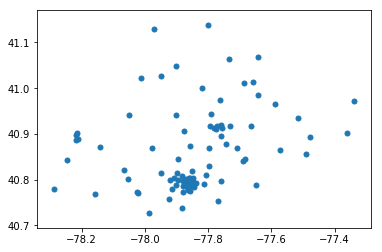

In [27]:
plt.scatter(df_precinct_locations['X'],df_precinct_locations['Y'], s=25)
plt.show()

**Problem 4: Using the above example, and the documentation on scatterplots, create two scatterplots using longitude and latitude X and Y locations, one showing percentage of vote for Trump, and other percentage of vote for Clinton. Make the Trump dots colored red, and Clinton blue.**

Find the [Scatterplot documentation here](http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html#scatter-plot)

Hint: You will need to join the results precincts file to the centroids, and then set the size of the plot points to be the percentages. This is accessed using the S property.

To perform the join, use merge. This [Stack Exchange](http://stackoverflow.com/questions/20375561/joining-pandas-dataframes-by-column-names) question will help!

In [28]:
# read in the election results
df_results = pd.read_table('data/centrecounty_precinct_results_nov2016.txt', sep=',')
df_results.head()

,County,ElecYear,Election,ElecDate,PrecNo,PrecName,Party,Contest,Descr,VoteFor,Candidate,Posn,Count,PctCnt,Total,PctTot
0,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,1.0,01 BELLEFONTE NORTH,NaN,REGISTERED VOTERS - TOTAL,NaN,NaN,NaN,10.0,507.0,NaN,NaN,NaN
1,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,1.0,01 BELLEFONTE NORTH,NaN,BALLOTS CAST - TOTAL,NaN,NaN,NaN,11.0,391.0,NaN,NaN,NaN
2,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,1.0,01 BELLEFONTE NORTH,NaN,VOTER TURNOUT - TOTAL,NaN,NaN,NaN,12.0,NaN,77.12,NaN,NaN
3,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,1.0,01 BELLEFONTE NORTH,DEMOCRATIC,STRAIGHT PARTY,NaN,VOTE FOR NOT MORE THAN 1,DEMOCRATIC,17.0,46.0,40.35,NaN,NaN
4,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,1.0,01 BELLEFONTE NORTH,REPUBLICAN,STRAIGHT PARTY,NaN,VOTE FOR NOT MORE THAN 1,REPUBLICAN,18.0,66.0,57.89,NaN,NaN


In [29]:
# merge the two datasets on precinct
df_merge = pd.merge(df_precinct_locations, df_results, left_on = 'Precinct', right_on = 'PrecNo')
df_merge

,X,Y,OBJECTID,NAME,Precinct,GlobalID,MDJ,ShapeSTAre,ShapeSTLen,County,...,Party,Contest,Descr,VoteFor,Candidate,Posn,Count,PctCnt,Total,PctTot
0,-77.972391,41.129340,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289,"CENTRE COUNTY, PENNSYLVANIA",...,NaN,REGISTERED VOTERS - TOTAL,NaN,NaN,NaN,3302.0,261.0,NaN,NaN,NaN
1,-77.972391,41.129340,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289,"CENTRE COUNTY, PENNSYLVANIA",...,NaN,BALLOTS CAST - TOTAL,NaN,NaN,NaN,3303.0,206.0,NaN,NaN,NaN
2,-77.972391,41.129340,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289,"CENTRE COUNTY, PENNSYLVANIA",...,NaN,VOTER TURNOUT - TOTAL,NaN,NaN,NaN,3304.0,NaN,78.93,NaN,NaN
3,-77.972391,41.129340,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289,"CENTRE COUNTY, PENNSYLVANIA",...,DEMOCRATIC,STRAIGHT PARTY,NaN,VOTE FOR NOT MORE THAN 1,DEMOCRATIC,3309.0,13.0,22.41,NaN,NaN
4,-77.972391,41.129340,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289,"CENTRE COUNTY, PENNSYLVANIA",...,REPUBLICAN,STRAIGHT PARTY,NaN,VOTE FOR NOT MORE THAN 1,REPUBLICAN,3310.0,44.0,75.86,NaN,NaN
5,-77.972391,41.129340,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289,"CENTRE COUNTY, PENNSYLVANIA",...,CONSTITUTION PARTY,STRAIGHT PARTY,NaN,VOTE FOR NOT MORE THAN 1,CONSTITUTION PARTY,3311.0,1.0,1.72,NaN,NaN
6,-77.972391,41.129340,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289,"CENTRE COUNTY, PENNSYLVANIA",...,GREEN,STRAIGHT PARTY,NaN,VOTE FOR NOT MORE THAN 1,GREEN,3312.0,0.0,NaN,NaN,NaN
7,-77.972391,41.129340,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289,"CENTRE COUNTY, PENNSYLVANIA",...,LIBERTARIAN,STRAIGHT PARTY,NaN,VOTE FOR NOT MORE THAN 1,LIBERTARIAN,3313.0,0.0,NaN,NaN,NaN
8,-77.972391,41.129340,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289,"CENTRE COUNTY, PENNSYLVANIA",...,DEMOCRATIC,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"HILLARY CLINTON, PRESIDENT",3318.0,45.0,21.95,NaN,NaN
9,-77.972391,41.129340,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289,"CENTRE COUNTY, PENNSYLVANIA",...,REPUBLICAN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"DONALD J TRUMP, PRESIDENT",3319.0,157.0,76.59,NaN,NaN


In [30]:
# query to pull out just the presidential election
df_pres = df_merge.loc[df_merge['Contest'] == 'PRESIDENTIAL ELECTORS']
df_pres.head()

,X,Y,OBJECTID,NAME,Precinct,GlobalID,MDJ,ShapeSTAre,ShapeSTLen,County,...,Party,Contest,Descr,VoteFor,Candidate,Posn,Count,PctCnt,Total,PctTot
8,-77.972391,41.12934,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289,"CENTRE COUNTY, PENNSYLVANIA",...,DEMOCRATIC,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"HILLARY CLINTON, PRESIDENT",3318.0,45.0,21.95,NaN,NaN
9,-77.972391,41.12934,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289,"CENTRE COUNTY, PENNSYLVANIA",...,REPUBLICAN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"DONALD J TRUMP, PRESIDENT",3319.0,157.0,76.59,NaN,NaN
10,-77.972391,41.12934,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289,"CENTRE COUNTY, PENNSYLVANIA",...,CONSTITUTION PARTY,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"DARRELL L CASTLE, PRESIDENT",3320.0,0.0,NaN,NaN,NaN
11,-77.972391,41.12934,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289,"CENTRE COUNTY, PENNSYLVANIA",...,GREEN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"JILL STEIN, PRESIDENT",3321.0,0.0,NaN,NaN,NaN
12,-77.972391,41.12934,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289,"CENTRE COUNTY, PENNSYLVANIA",...,LIBERTARIAN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"GARY JOHNSON, PRESIDENT",3322.0,2.0,0.98,NaN,NaN


In [69]:
# Map 1: Votes for Trump
# select for just Trump voter data
df_trump = df_pres.loc[df_merge['Candidate'] == 'DONALD J TRUMP,  PRESIDENT']
df_trump.head()

,X,Y,OBJECTID,NAME,Precinct,GlobalID,MDJ,ShapeSTAre,ShapeSTLen,County,...,Party,Contest,Descr,VoteFor,Candidate,Posn,Count,PctCnt,Total,PctTot
9,-77.972391,41.129340,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289,"CENTRE COUNTY, PENNSYLVANIA",...,REPUBLICAN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"DONALD J TRUMP, PRESIDENT",3319.0,157.0,76.59,NaN,NaN
48,-77.641414,41.068505,2,LIBERTY,60,{57577111-D7B7-4048-9517-EF2ED6059928},49-3-02,6.878831e+08,131265.443714,"CENTRE COUNTY, PENNSYLVANIA",...,REPUBLICAN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"DONALD J TRUMP, PRESIDENT",5023.0,557.0,71.50,NaN,NaN
87,-77.688090,41.010310,3,HOWARD TWP,58,{C9B8B5CF-6699-485A-97D2-74FB9B2D6FFE},49-3-02,5.275320e+08,111072.612891,"CENTRE COUNTY, PENNSYLVANIA",...,REPUBLICAN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"DONALD J TRUMP, PRESIDENT",4854.0,350.0,72.31,NaN,NaN
126,-77.642348,40.985981,4,MARION,61,{FA3740D2-624B-4464-B6CD-16F6E219ADEA},49-3-02,6.135493e+08,131038.017743,"CENTRE COUNTY, PENNSYLVANIA",...,REPUBLICAN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"DONALD J TRUMP, PRESIDENT",5108.0,347.0,68.44,NaN,NaN
165,-77.949892,41.027568,5,SNOW SHOE,14,{908F092A-BCFF-4EA5-99D7-B9248A2EA56A},49-3-03,1.644442e+07,19920.287608,"CENTRE COUNTY, PENNSYLVANIA",...,REPUBLICAN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"DONALD J TRUMP, PRESIDENT",1129.0,236.0,71.73,NaN,NaN


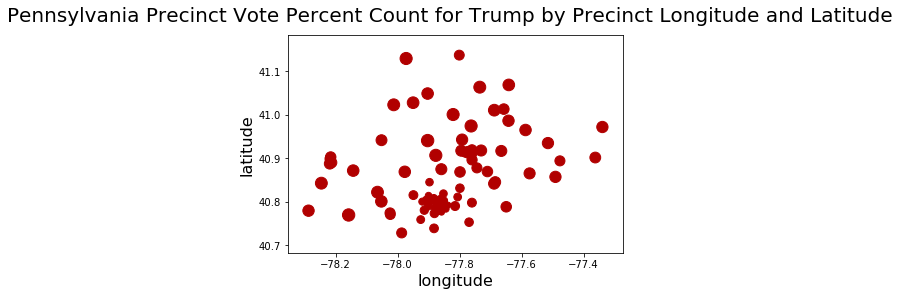

In [96]:
# Scatter Plot for Trump
plt.scatter(df_trump['X'],df_trump['Y'], s=df_trump['PctCnt']**1.15, color = '#b10000')
plt.suptitle('Pennsylvania Precinct Vote Percent Count for Trump by Precinct Longitude and Latitude', fontsize=20)
plt.xlabel('longitude', fontsize=16)
plt.ylabel('latitude', fontsize=16)
plt.show()

In [37]:
# Map 2: Votes for Clinton
# Add your code below:
df_clinton = df_pres.loc[df_merge['Candidate'] == 'HILLARY CLINTON,  PRESIDENT']
df_clinton.head()

,X,Y,OBJECTID,NAME,Precinct,GlobalID,MDJ,ShapeSTAre,ShapeSTLen,County,...,Party,Contest,Descr,VoteFor,Candidate,Posn,Count,PctCnt,Total,PctTot
8,-77.972391,41.129340,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289,"CENTRE COUNTY, PENNSYLVANIA",...,DEMOCRATIC,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"HILLARY CLINTON, PRESIDENT",3318.0,45.0,21.95,NaN,NaN
47,-77.641414,41.068505,2,LIBERTY,60,{57577111-D7B7-4048-9517-EF2ED6059928},49-3-02,6.878831e+08,131265.443714,"CENTRE COUNTY, PENNSYLVANIA",...,DEMOCRATIC,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"HILLARY CLINTON, PRESIDENT",5022.0,184.0,23.62,NaN,NaN
86,-77.688090,41.010310,3,HOWARD TWP,58,{C9B8B5CF-6699-485A-97D2-74FB9B2D6FFE},49-3-02,5.275320e+08,111072.612891,"CENTRE COUNTY, PENNSYLVANIA",...,DEMOCRATIC,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"HILLARY CLINTON, PRESIDENT",4853.0,117.0,24.17,NaN,NaN
125,-77.642348,40.985981,4,MARION,61,{FA3740D2-624B-4464-B6CD-16F6E219ADEA},49-3-02,6.135493e+08,131038.017743,"CENTRE COUNTY, PENNSYLVANIA",...,DEMOCRATIC,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"HILLARY CLINTON, PRESIDENT",5107.0,128.0,25.25,NaN,NaN
164,-77.949892,41.027568,5,SNOW SHOE,14,{908F092A-BCFF-4EA5-99D7-B9248A2EA56A},49-3-03,1.644442e+07,19920.287608,"CENTRE COUNTY, PENNSYLVANIA",...,DEMOCRATIC,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"HILLARY CLINTON, PRESIDENT",1128.0,83.0,25.23,NaN,NaN


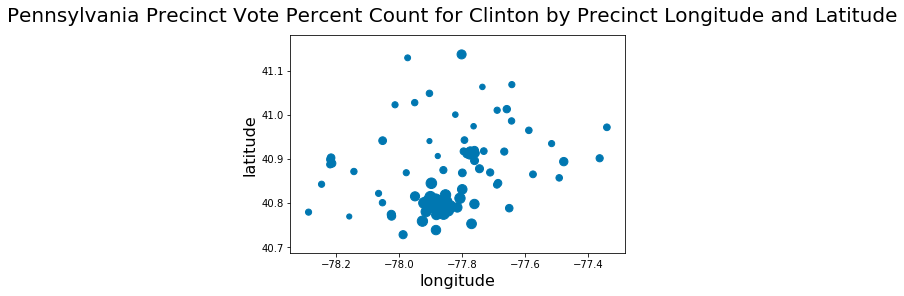

In [99]:
# Scatter Plot for Clinton
plt.scatter(df_clinton['X'],df_clinton['Y'], s=df_clinton['PctCnt']**1.15, color = '#0077b1')
plt.suptitle('Pennsylvania Precinct Vote Percent Count for Clinton by Precinct Longitude and Latitude', fontsize=20)
plt.xlabel('longitude', fontsize=16)
plt.ylabel('latitude', fontsize=16)
plt.show()

## Graphic Presentation

Make sure to label all the axis, add legends and units (where appropriate).


## Code Quality

While code performance and optimization won't count, all the code should be highly readable, and reusable. Where possible, create functions, build helper functions where needed, and make sure the code is self-explanatory.